Osnabrück University - Computer Vision (Winter Term 2018/19) - Prof. Dr.-Ing. G. Heidemann, Ulf Krumnack

# Exercise Sheet 03: Morphological Operations¶

## Introduction

This week's sheet should be solved and handed in before the end of **Sunday, November 25, 2018**. If you need help (and Google and other resources were not enough), feel free to contact your groups' designated tutor or whomever of us you run into first. Please upload your results to your group's Stud.IP folder.

## Assignment 0: Math recap (complex numbers) [0 Points]

This exercise is supposed to be very easy, does not give any points, and is voluntary. There will be a similar exercise on every sheet. It is intended to revise some basic mathematical notions that are assumed throughout this class and to allow you to check if you are comfortable with them. Usually you should have no problem to answer these questions offhand, but if you feel unsure, this is a good time to look them up again. You are always welcome to discuss questions with the tutors or in the practice session. Also, if you have a (math) topic you would like to recap, please let us know.

**a)** What is a *complex number*, what is the *complex plane*, how are complex numbers usually denoted?

The complex numbers, usually denoted by $\mathbb{C}$, are the algebraic closure of the real numbers $\mathbb{R}$, meaning that every non-constant polynomial has some root in $\mathbb{C}$. This is realized by adding "artificial" numbers to provide the necessary roots missing in $\mathbb{R}$, e.g. a new number $i$ with $i^2=-1$, as a root for the polynomial $X^2+1$. In fact, all complex numbers can be written as $a+b\cdot i$ with some $a,b\in\mathbb{R}$.

The complex plane is a geometric embedding of complex numbers into the two-dimensional Euclidean plane, mapping the number $a+b\cdot i$ on the point $(a,b)$. It was a major breakthrough towards the acceptance of complex numbers, as this embedding allows to give geometric interpretations to arithmetic operations like sum and product.

**b)** What is the *real* and the *imaginary* part of a complex number? What is the *absolute value* of a complex number? What is the *complex conjugate*?

Given a complex number $c=a+b\cdot i$, the real number $a = \Re c$ is called the real part and $b=\Im c$ is called the imaginary part of $c$. In fact, the real numbers can be seen as the subset of real numbers whose imaginary part is $0$.

The absolute value of $c$ is just the Euclidean norm of $c$ in the complex plane, i.e., its distance from the origin: $|c| = \sqrt{(\Re c)^2 + (\Im c)^2}$

The complex conjugate of a complex number is obtained by changing the sign of its imaginary part: $\bar{c} = \Re c - \Im c$. Hence the conjugate of a real number is just that number.

**c)** What are polar coordinates? What are their advantages? Can you convert between cartesian and polar coordinates? Can you write down $i=\sqrt{-1}$ in polar coordinates? What about $\sqrt{i}$?

Polar coordinates represent the position in a plane as a pair $(r, \phi)$, where $r$ denotes the distance from the center and $\phi$ the angle. Polar coordinates for complex numbers have the advantage, that multiplication (and exponents) get a very simple gemetrical meaning. The product of two numbers (in polar coordinates) is formed as

$$(r_1,\phi_1)\cdot(r_2,\phi_2) = (r_1r_2,\phi_1+\phi_2)$$

that is, distances are multiplied while angles are sumed up. This leads to the following simple rule for exponents (which even holds for fractional $n$):

$$(r,\phi)^n = (r^n,n\cdot \phi)$$

Hence we get the following polar coordinates for $i$ (note that the polar coordinates for $-1$ are $(1,\pi))$:

$$i = \sqrt{-1} = (1,\pi)^{\tfrac12} = (1,\tfrac12\pi)$$

and further

$$\sqrt{i} = (1,\tfrac12\pi)^{\tfrac12} = (1,\tfrac14\pi)$$

From the polar coordinates we can obtain cartesian coordinates as

$$\Re c= r\cdot\cos(\phi)\qquad \text{and}\qquad \Im c=r\cdot\sin(\phi)$$

So we get:
$$\sqrt{i} = \cos(\frac14\pi)+i\cdot\sin(\frac14\pi) = \frac{\sqrt{2}}{2}(1+i)$$

**d)** Python, and also numpy, support calculations with complex numbers. Consult the documentation to find out details. Notice that $i$ is substituted by $j$ in Python.

In [1]:
a = 3 + 4j
b = complex(3, 4)
print("a = {}, type(a) = {}".format(a, type(a)))
print("b = {}, type(b) = {}".format(b, type(b)))
print("real(a) = {}, imag(a) = {}".format(a.real,a.imag))
print("abs(a) = {}".format(abs(a)))
print("conjugate(a) = {}".format(a.conjugate()))
print("i*i = {}".format(1j**2))

# normal "math" functions are non complex:
print("-- the math module ---------------------------")
import math
#print(math.sqrt(-1)) # ValueError: math domain error
#print(math.sin(3+4j)) # TypeError: can't convert complex to float
#print(math.exp(2*math.pi*1j)) # TypeError: can't convert complex to float

# but there is a "cmath" module
print("-- the cmath module --------------------------")
import cmath
print(cmath.sqrt(-1))
print(cmath.sin(3+4j))
print(cmath.exp(2*math.pi*1j))

# numpy has its own types for complex numbers (np.complex64 and np.complex128)
print("-- numpy -------------------------------------")
import numpy as np
a = np.complex64(3+4j)
print("a = {}, type(a) = {}".format(a, type(a)))
print("a*a = {}".format(a**2))
print("real(a) = {}, imag(a) = {}".format(a.real,a.imag))
print("abs(a) = {}".format(abs(a)))
print("conjugate(a) = {}".format(a.conjugate()))

# numpy supports computation with complex numbers (provided the input arguments are complex)
print(np.sqrt(-1)) # Warning: invalid value encountered in sqrt
print(np.sqrt(-1+0j))
print(np.sin(3+4j))
print(np.exp(2*np.pi*1j))

a = (3+4j), type(a) = <class 'complex'>
b = (3+4j), type(b) = <class 'complex'>
real(a) = 3.0, imag(a) = 4.0
abs(a) = 5.0
conjugate(a) = (3-4j)
i*i = (-1+0j)
-- the math module ---------------------------
-- the cmath module --------------------------
1j
(3.853738037919377-27.016813258003936j)
(1-2.4492935982947064e-16j)
-- numpy -------------------------------------
a = (3+4j), type(a) = <class 'numpy.complex64'>
a*a = (-7+24j)
real(a) = 3.0, imag(a) = 4.0
abs(a) = 5.0
conjugate(a) = (3-4j)
nan
1j
(3.85373803792-27.016813258j)
(1-2.44929359829e-16j)


C:\Users\go_fo\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in sqrt


## Assignment 1: Properties of morphological operators [5 Points]

This exercise will elaborate on the basic morphological operators of *erosion* and *dilation* (cf. CV-05 slides 4-14).

### a) Duality

Proof that *erosion* and *dilation* are *dual* operators, i.e.

$$ g^{\ast}\oplus S = (g\ominus S)^{\ast}\qquad\text{and}\qquad
g^{\ast}\ominus S = (g\oplus S)^{\ast}$$

here $g^{\ast}$ denotes the inverted binary image, i.e. $g^{\ast}(x,y) = 1 - g(x,y) = \neg g(x,y)$, i.e. 1-pixel become 0 and 0-pixel become 1.

Intuitively, this can be expressed by saying that extending the fringe of an object is "eating" from the fringe of its complement. Formally, one can write
\begin{align}
(g^{\ast}\oplus S)(x,y)
& = \bigvee_{(i,j)\in S} g^{\ast}(x+i,y+j) \\
& = \bigvee_{(i,j)\in S} \neg g(x+i,y+j) \\
& = \neg\bigwedge_{(i,j)\in S} g(x+i,y+j) \\
&= \neg(g\ominus S)(x,y) \\
&= (g\ominus S)^{\ast}(x,y)
\end{align}
The other case is analogous.

### b) Superposition

As *erosion* and *dilation* have been introduced for binary images, the notion of *linearity* is not really appropriate here. However, some weaker version, called *superposition* can be defined: instead of forming linear combination, one takes the logical disjunction:

$$(g_1\lor g_2)(x,y) := g_1(x,y)\lor g_2(x,y)$$

Check for both operations if *erosion* and *dilation* are "compatible" with superposition, i.e. if first *eroding* (or *dilating*) two images and superposing the result is the same as first superposing the images and then *eroding* (or *dilating*) the result.

The superposition principle holds for *dilation*, as we are just dealing with disjunctions: 

\begin{align*}
    ((g_1\lor g_2)\oplus S)(x,y)
    & = \bigvee_{(i,j)\in S} (g_1\lor g_2)(x+i,y+j) \\
    & = \bigvee_{(i,j)\in S} \left(g_1(x+i,y+j) \lor g_2(x+i,y+j)\right) \\
    & = \left(\bigvee_{(i,j)\in S} g_1(x+i,y+j)\right) \lor \left(\bigvee_{(i,j)\in S}g_2(x+i,y+j)\right) \\
    & = (g_1\oplus S)(x,y)\lor (g_2\oplus S)(x,y)
\end{align*}


For erosion, the superposition principle does not hold in general: Example (with zero padding): 

$$
g_1 = \left(
\begin{array}{lll}
1 & 0 & 1 \end{array}\right)\qquad 
g_2 = \left(
\begin{array}{lll}
0 & 1 & 0 \end{array}\right)\qquad 
S = \left( \begin{array}{lll} 1 & 1 & 1 \end{array} \right)
$$

$$
\begin{align*}
    (g_1\lor g_2)\ominus S)(x,y) 
    & = \left( \left( \begin{array}{lll} 1 & 0 & 1 \end{array} \right) \lor
        \left( \begin{array}{lll} 0 & 1 & 0 \end{array} \right) \right) \ominus
        \left( \begin{array}{lll} 1 & 1 & 1 \end{array} \right) \\
    & = \left( \begin{array}{lll} 1 & 1 & 1 \end{array} \right) \ominus
        \left( \begin{array}{lll} 1 & 1 & 1 \end{array} \right) \\
    & = \left( \begin{array}{lll} 0 & 1 & 0 \end{array} \right) \\
    (g_1\ominus S)(x,y)  \lor (g_2\ominus S)(x,y) 
    & = \left( \left( \begin{array}{lll} 1 & 0 & 1 \end{array} \right) \ominus
        \left( \begin{array}{lll} 1 & 1 & 1 \end{array} \right) \right) \lor
        \left( \left( \begin{array}{lll} 0 & 1 & 0 \end{array} \right) \ominus
        \left( \begin{array}{lll} 1 & 1 & 1 \end{array} \right) \right) \\
    & = \left( \begin{array}{lll} 0 & 0 & 0 \end{array} \right) \lor
        \left( \begin{array}{lll} 0 & 0 & 0 \end{array} \right) \\
    & = \left( \begin{array}{lll} 0 & 0 & 0 \end{array} \right)
\end{align*}
$$


But one can show a weaker form, namely

$$(g_1\lor g_2)\ominus S \to (g_1\ominus S)\lor (g_2\ominus S)$$

holds. That is, the erosion of the combination of two images is in general larger than the combination of two eroded images. The following cell shows an example of the effect of superposition on erosion.

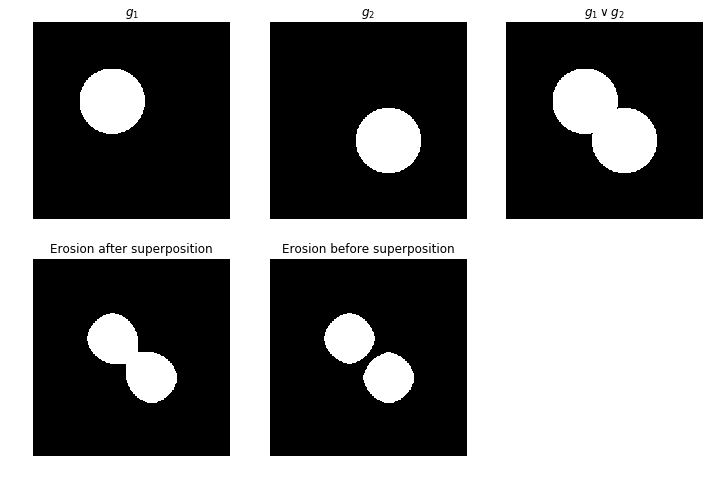

In [1]:
from skimage import morphology, draw
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'

circle_left_img = np.zeros(shape=(300, 300), dtype=np.uint8)
circle_left_img[draw.circle(120, 120, 50)] = 1

circle_right_img = np.zeros_like(circle_left_img)
circle_right_img[draw.circle(180, 180, 50)] = 1


kernel = morphology.square(20)
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1); plt.axis('off'); plt.title(r'$g_1$')
plt.imshow(circle_left_img)

plt.subplot(2, 3, 2); plt.axis('off'); plt.title(r'$g_2$')
plt.imshow(circle_right_img)

plt.subplot(2, 3, 3); plt.axis('off'); plt.title(r'$g_1 \vee g_2$')
plt.imshow(circle_left_img | circle_right_img)
    
plt.subplot(2, 3, 4); plt.axis('off'); plt.title('Erosion after superposition')
plt.imshow(morphology.binary_erosion(circle_left_img | circle_right_img, selem=kernel))

plt.subplot(2, 3, 5); plt.axis('off'); plt.title('Erosion before superposition')
plt.imshow(morphology.binary_erosion(circle_left_img, selem=kernel) 
           | morphology.binary_erosion(circle_right_img, selem=kernel))

plt.show()

### c) Chaining

Show that *dilation* and *erosion* have the following properties: given two structering elements $S_1$ and $S_2$, it holds

\begin{align}
  (g\oplus S_1)\oplus S_2 & & = & g\oplus (S_1\oplus S_2) && = (g\oplus S_2)\oplus S_1 \\
  (g\ominus S_1)\ominus S_2 & & = & g\ominus (S_1\oplus S_2) && = (g\ominus S_2)\ominus S_1 \\  
\end{align}

What are the practical consequences?

Proof: First, by straight forward calculation we get:
\begin{align*}
  ((g\oplus S_1)\oplus S_2)(x,y)
  &= \bigvee_{(k,l)\in S_2}(g\oplus S_1)(x+k,y+l) \\
  &= \bigvee_{(k,l)\in S_2}\bigvee_{(i,j)\in S_1}g(x+k+i,y+l+j) \\
  &= \bigvee_{(i,j)\in S_1}\bigvee_{(k,l)\in S_2}g(x+k+i,y+l+j) \\
  &= \bigvee_{(i,j)\in S_1}(g\oplus S_2)(x+i,y+j) \\
  &= ((g\oplus S_2)\oplus S_1)(x,y)
\end{align*}  
so we see that the left and right side of the first row agree. To see that also the middle term is equivalent, note that $(k+i,l+j)\in S_1\oplus S_2$ is equivalent to $(i,j)\in S_1$ and $(k,l)\in S_2$. The second row is analogous, replacing $\bigvee$ by $\bigwedge$.

Practically this means, if one is going to erode or dilate an image with different structuring elements, 
1. the order of application does not matter
2. it is usually more efficient to form a combined structural element by dilation and the apply this combined element to the image.

## Assignment 2: Application [5 Points]


### a) Boundary extraction

Extract the boundary of a shape using opening or closing. You may use `binary_dilation` or `binary_erosion` from `scipy.ndimage.morphology`. Can you achieve a thicker boundary?

<Figure size 432x288 with 0 Axes>

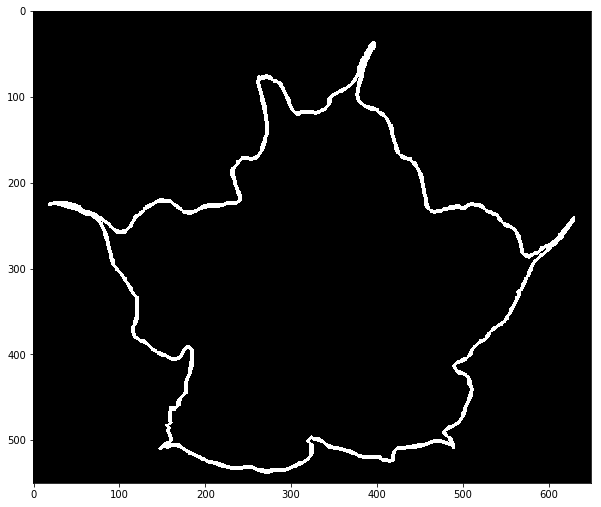

In [6]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import scipy.ndimage.morphology as morph

def my_boundary(img):
    """
    Compute boundary of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
        
    Returns
    -------
    boundary : ndarray of bools
        The boundary as a binary image.
    """
    
    boundary = np.zeros(img.shape,np.bool)
    # BEGIN SOLUTION
    boundary = img ^ morph.binary_erosion(img, iterations=5)
    # END SOLUTION
    
    return boundary
    
img = plt.imread("images/engelstrompete.png") > 0
plt.gray()
plt.figure(figsize=(10,10))
plt.imshow(my_boundary(img))
plt.show()

### b)  Distance transform

Implement distance transform according to the ideas of (CV-05 slides 34ff).  Discuss the effect of different structuring elements.

<IPython.core.display.Javascript object>


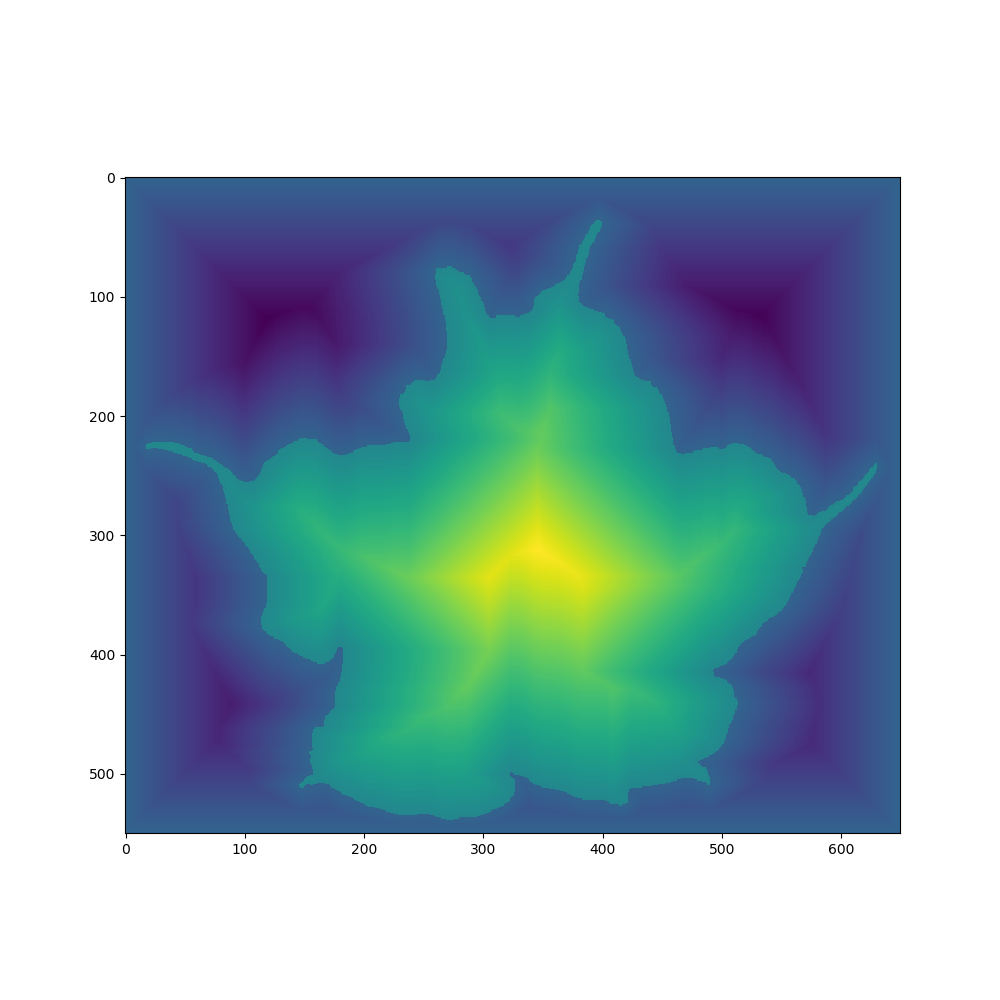

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import morphology as morph, generate_binary_structure

def my_distance_transform(img):
    """
    Distance transform of binary image.

    Parameters
    ----------
    img : ndarray of bools
        A binary image.
        
    Returns
    -------
    dt : ndarray of ints
        The distance transform of the input image.
    """
    
    dt = np.zeros(img.shape,np.int32)
    # BEGIN SOLUTION
    while img.any():
        dt += img
        # generate_binary_structure(2, 1) -> N4 neighborhood -> city block distance
        # generate_binary_structure(2, 2) -> N8 neighborhood -> chessboard distance
        img = morph.binary_erosion(img, generate_binary_structure(2, 1))
    # END SOLUTION

    return dt


img = plt.imread("images/engelstrompete.png") > 0
plt.figure(figsize=(10,10))
plt.imshow(my_distance_transform(img)-my_distance_transform(~img) + 50 * img)
plt.show()

One can use different structuring elements to realize a different metric:

* $\begin{pmatrix} 0 & 1 & 0 \\ 1 & 1 & 1 \\ 0 & 1 & 0 \end{pmatrix}$ (the $N_4$-neighborhood) realizes the cityblock distance ($L_1$)
* $\begin{pmatrix} 1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{pmatrix}$ (the $N_8$-neighborhood) realizes the chessboard distance ($L_\infty$)



### c) Morphing

Write a function `my_morph` that implements morphing according to (CV-05 slide 41). You may use your function `my_distance_transform` from part b), or the function `distance_transform_edt` from `scipy.ndimage.morphology`.

<Figure size 432x288 with 0 Axes>

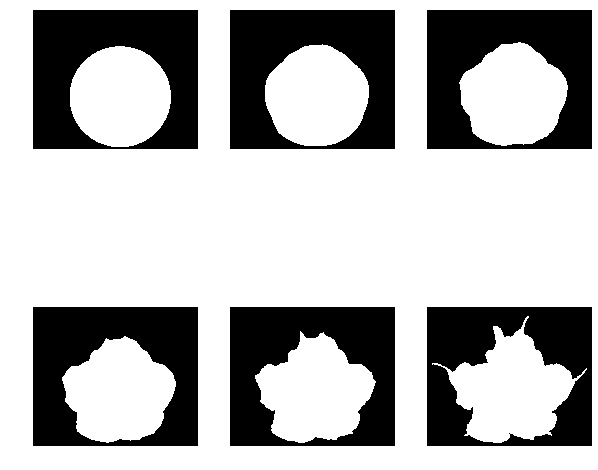

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph


def my_morph(A,B,ratio):
    """
    Morphing from binary image A to image B.

    Parameters
    ----------
    A : ndarray of bools
        A binary image (start).
    B : ndarray of bools
        A binary image (target), same shape as A.
    ratio : float from 0.0 to 1.0
        The ratio of image A and image B.
        0.0=only image A, 1.0=only image B.
        
    Returns
    -------
    morph : ndarray of bools
        A binary intermediate image between A and B.
    """

    result = np.zeros(A.shape,np.bool)
    # BEGIN SOLUTION
    dA = morph.distance_transform_edt(A) - morph.distance_transform_edt(~A)
    dB = morph.distance_transform_edt(B) - morph.distance_transform_edt(~B)
    result = (1-ratio)*dA + ratio*dB > 0
    # END SOLUTION
    
    return result

img1 = plt.imread("images/kreis.png") > 0
img2 = plt.imread("images/engelstrompete.png") > 0

plt.gray()
plt.figure(figsize=(10,10))
for i, ratio in enumerate(np.linspace(0, 1, 6), 1):
    plt.subplot(2, 3, i)
    plt.imshow(my_morph(img1, img2, ratio))
    plt.axis('off')
plt.show()

<IPython.core.display.Javascript object>


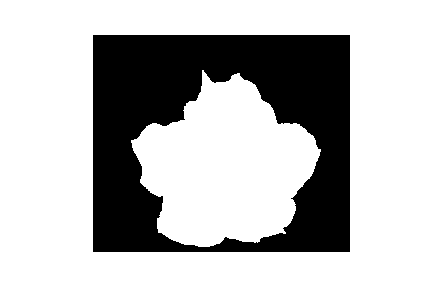

In [6]:
# If you want to see your morph as an animation, run this cell. 
# Close the output (press the blue "Stop interaction" button) once you are done!

# Due to some matplotlib problem you may have to restart your kernel!
%matplotlib notebook
%matplotlib notebook
import matplotlib.animation as animation
fig = plt.figure()

ims = []
for i, ratio in enumerate(np.linspace(0, 1, 24), 1):
    plt.axis('off')
    im = plt.imshow(my_morph(img1, img2, ratio), cmap='gray', animated=True)
    ims.append([im])  
    
ani = animation.ArtistAnimation(fig, ims + list(reversed(ims)), interval=100, blit=True)

plt.show()

## Assignment 3: Implementation: Skeletonization [5 Points]

### a) Skeletonization with hit-or-miss

Explain in your own words, how the hit-or-miss operator can be used for skeletonization (cf CV-05 slide 49).  

The hit-or-miss operator is used to detect small patterns in an image. To form the skeleton of an object in a binary image, one has to avoid to disconnect the "bones". The idea is to iteratively "eat" pixels from the boundary of the figure, but only in a way that will not break connectivity. The trick is to define a set of hit-or-miss operators that will detect boundary pixels that can be eaten without harm: they are all designed in a way, that they detect  a connected structures that stay connected even after removing the central pixel. Repeated application of these hit-and-miss operators will finally leave only the skeleton.

### b) Implementation of skeletonization

Now use this method to implement your own skeletonization function. It is ok to use
`scipy.ndimage.morphology.binary_hit_or_miss` here (but of course *not* `skimage.morphology.skeletonize` or similar functions). Compare your result with (CV-05 slide 50). Note that computing the skeleton using this method may take some time ...

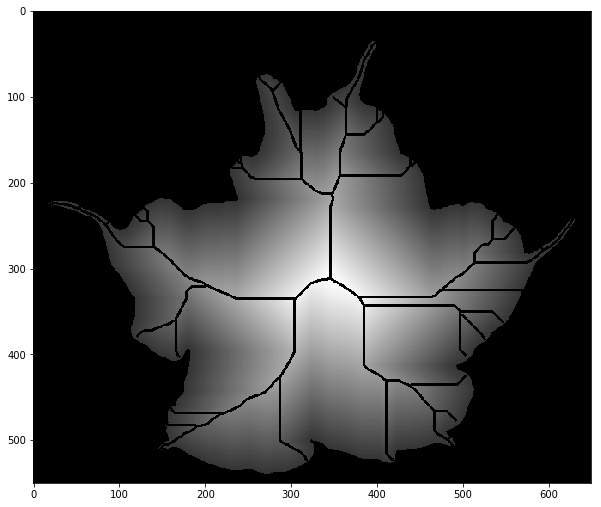

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph

def my_skeletonize(img):
    """
    Compute the skeloton of a binary image using hit_or_miss operator.
    
    Parameters
    ----------
    img : ndarray of bools
        Binary image to be skeletonized.
    
    Returns
    -------
    skeleton : ndarray of bools
        The skeleton of the input image.
    """
    # BEGIN SOLUTION
    skeleton = np.zeros(img.shape,np.bool)
    
    sl_hit = np.asarray([[0,0,1],[0,1,1],[0,0,1]], np.bool)
    sl_miss = np.asarray([[1,0,0],[1,0,0],[1,0,0]], np.bool)

    sr_hit = np.asarray([[1,0,0],[1,1,0],[1,0,0]], np.bool)
    sr_miss = np.asarray([[0,0,1],[0,0,1],[0,0,1]], np.bool)

    so_hit = np.asarray([[0,0,0],[0,1,0],[1,1,1]], np.bool)
    so_miss = np.asarray([[1,1,1],[0,0,0],[0,0,0]], np.bool)

    su_hit = np.asarray([[1,1,1],[0,1,0],[0,0,0]], np.bool)
    su_miss = np.asarray([[0,0,0],[0,0,0],[1,1,1]], np.bool)

    slu_hit = np.asarray([[0,0,0],[0,1,1],[0,1,1]], np.bool)
    slu_miss = np.asarray([[1,1,0],[1,0,0],[0,0,0]], np.bool)

    slo_hit = np.asarray([[0,1,1],[0,1,1],[0,0,0]], np.bool)
    slo_miss = np.asarray([[0,0,0],[1,0,0],[1,1,0]], np.bool)

    sru_hit = np.asarray([[0,0,0],[1,1,0],[1,1,0]],np.bool)
    sru_miss = np.asarray([[0,1,1],[0,0,1],[0,0,0]],np.bool)

    sro_hit = np.asarray([[1,1,0],[1,1,0],[0,0,0]],np.bool)
    sro_miss = np.asarray([[0,0,0],[0,0,1],[0,1,1]],np.bool)

    while (skeleton != img).any():
        skeleton = img
        img = img ^ morph.binary_hit_or_miss(img, sl_hit, sl_miss)
        img = img ^ morph.binary_hit_or_miss(img, sr_hit, sr_miss)
        img = img ^ morph.binary_hit_or_miss(img, so_hit, so_miss)
        img = img ^ morph.binary_hit_or_miss(img, su_hit, su_miss)

        img = img ^ morph.binary_hit_or_miss(img, slo_hit, slo_miss)
        img = img ^ morph.binary_hit_or_miss(img, slu_hit, slu_miss)
        img = img ^ morph.binary_hit_or_miss(img, sro_hit, sro_miss)
        img = img ^ morph.binary_hit_or_miss(img, sru_hit, sru_miss)
    
    return skeleton
    # END SOLUTION


img = plt.imread("images/engelstrompete.png") > 0
skel = my_skeletonize(img)
result = morph.distance_transform_cdt(img, metric='taxicab') + (50 * img)
result[morph.binary_dilation(skel)] = 0
plt.figure(figsize=(10,10))
plt.gray()
plt.imshow(result)
plt.show()

## Assignment 4: Custom Structuring Element [5 points]

Landsat 7 is a satelite mission for acquisition of satellite imagery of Earth. Unfortunately the Scan Line Corrector failed, resulting in black stripes on the aquired images. More information: https://landsat.usgs.gov/slc-products-background


### a) A first fix

A rather crude fix is to apply a custom structuring element for dilation and erosion (see CV-05, 24ff). Complement the code below (in part (b)) in the following way:
* Rotate the image such that the gaps are horizontal.
* Dilate the rotated image with a vertical structuring element. I.e. take the maximum of an area of size $7 \times1$ and assign it to the center pixel. Repeat for all pixels.
* Erode the dilated image.
* Rotate the result back.

Remark: this exercise applies morphological operator to color images. This extends the idea of generalizing morphological operators to gray value images (CV-05, slide 52).  

### b) Improving the solution
You may get better results by thresholding and applying the morphological operations only to pixels below a threshold, i.e. gap pixels. Compliment your solution from a). 

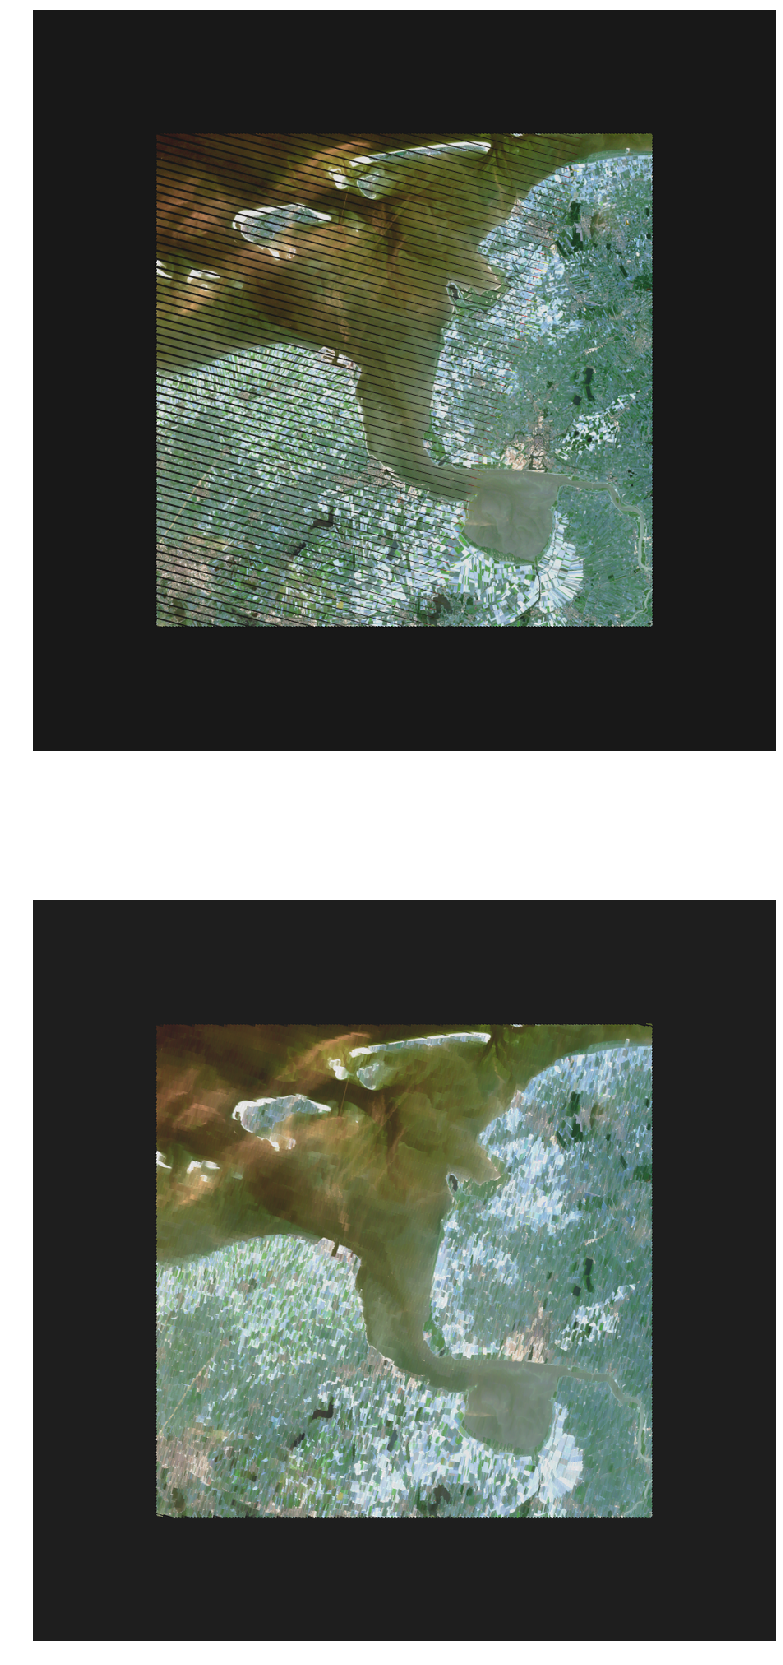

In [12]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage.morphology as morph
import scipy.ndimage as ndimg
from skimage.transform import rescale as rescale

angle = 15
thresh = 300
struc_elem = np.ones((7,1), dtype=np.bool)

img = plt.imread("images/landsat_stack2.png")
img2 = img.copy()
img3 = img.copy()

# BEGIN SOLUTION
img = ndimg.rotate(img, angle)
img2 = img.copy()
img3 = img.copy()

struc_elem_height_half = len(struc_elem)//2

# Dilation
for i in np.arange(struc_elem_height_half, img.shape[0] - struc_elem_height_half):
    for j in np.arange(0, img.shape[1]):
        if (np.sum(img[i,j,:]) < thresh):
            img2[i,j,:] = np.max(img[i-struc_elem_height_half:i+struc_elem_height_half,j,:], axis=0)

# Erosion
for i in np.arange(struc_elem_height_half, img.shape[0] - struc_elem_height_half):
    for j in np.arange(0, img.shape[1]):
        if (np.sum(img[i,j,:]) < thresh):
            img3[i,j,:] = np.min(img2[i-struc_elem_height_half:i+struc_elem_height_half,j,:], axis=0)           
            
img = ndimg.rotate(img, -angle)
img2 = ndimg.rotate(img2, -angle)
img3 = ndimg.rotate(img3, -angle)
# END SOLUTION
img = (img - np.min(img))/np.ptp(img)
img3 = (img3 - np.min(img3))/np.ptp(img3)

plt.figure(figsize=(15,30))
plt.subplot(2,1,1); plt.imshow(img); plt.axis('off')
plt.subplot(2,1,2); plt.imshow(img3); plt.axis('off')
plt.show()


### c) Bonus
Can you think of other ways to add the missing data? 
